# 🚀 Pipeline de Détection d'Objets YOLOv8 - GPU RTX 3070

## Système de Détection d'Objets Optimisé GPU

**Auteur :** Youssef Rahli  
**Date :** 13 décembre 2025  
**GPU :** NVIDIA GeForce RTX 3070 (8 Go VRAM)  
**CUDA :** 12.9  
**Python :** 3.10.11  

---

## 📋 Aperçu du Notebook

Ce notebook implémente un pipeline complet de détection d'objets avec **YOLOv8** optimisé pour GPU :

1. **Configuration GPU** – Détection CUDA, cuDNN optimization, mixed precision
2. **Chargement du jeu de données** – Format YOLOv8/YOLO standard
3. **Initialisation du modèle** – yolov8n.pt / yolov8s.pt sur GPU
4. **Entraînement** – Entièrement sur GPU avec AMP
5. **Évaluation** – mAP, Précision, Rappel, F1
6. **Inférence** – Prédiction sur GPU
7. **Visualisation** – Courbes de perte et métriques

**Fonctionnalités :**
- ✅ Exécution 100% GPU (device=0)
- ✅ Optimisation cuDNN (benchmark=True)
- ✅ Précision mixte automatique (AMP)
- ✅ Optimisé pour RTX 3070 (8 Go VRAM)
- ✅ Code entièrement commenté

---

## 1️⃣ Installation de l'Environnement et des Dépendances

Installation de tous les packages requis : PyTorch avec support CUDA 12.x, ultralytics YOLOv8, OpenCV, et bibliothèques de visualisation.

In [16]:
# ============================================================================
# 📦 INSTALLATION DES PACKAGES REQUIS
# ============================================================================
# Ce bloc installe tous les packages nécessaires pour YOLOv8 avec support GPU

import sys
import subprocess

def installer_packages():
    """
    Installe tous les packages requis pour le pipeline YOLOv8 GPU.
    PyTorch avec CUDA 12.1 est compatible avec CUDA 12.9.
    """
    
    print("=" * 80)
    print("🚀 Installation des packages pour YOLOv8 avec support GPU")
    print("=" * 80)
    
    # Liste des packages à installer
    packages = [
        'ultralytics',           # YOLOv8 officiel
        'opencv-python>=4.8.0',  # Traitement d'images
        'matplotlib>=3.7.0',     # Visualisation
        'seaborn>=0.12.0',       # Graphiques avancés
        'pandas>=2.0.0',         # Manipulation de données
        'pyyaml>=6.0',           # Configuration YAML
        'tqdm>=4.65.0',          # Barres de progression
        'Pillow>=10.0.0',        # Manipulation d'images
        'scipy>=1.11.0',         # Calculs scientifiques
    ]
    
    for package in packages:
        try:
            print(f"\n📦 Installation de {package}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
            print(f"   ✅ {package} installé avec succès")
        except subprocess.CalledProcessError as e:
            print(f"   ⚠️ Attention : Échec de l'installation de {package} : {e}")
    
    print("\n" + "=" * 80)
    print("✅ Installation terminée !")
    print("=" * 80)
    print("\n💡 Note : PyTorch avec CUDA doit être installé séparément :")
    print("   pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121")

# Lancer l'installation
installer_packages()

🚀 Installation des packages pour YOLOv8 avec support GPU

📦 Installation de ultralytics...
   ✅ ultralytics installé avec succès

📦 Installation de opencv-python>=4.8.0...
   ✅ opencv-python>=4.8.0 installé avec succès

📦 Installation de matplotlib>=3.7.0...
   ✅ matplotlib>=3.7.0 installé avec succès

📦 Installation de seaborn>=0.12.0...
   ✅ seaborn>=0.12.0 installé avec succès

📦 Installation de pandas>=2.0.0...
   ✅ pandas>=2.0.0 installé avec succès

📦 Installation de pyyaml>=6.0...
   ✅ pyyaml>=6.0 installé avec succès

📦 Installation de tqdm>=4.65.0...
   ✅ tqdm>=4.65.0 installé avec succès

📦 Installation de Pillow>=10.0.0...
   ✅ Pillow>=10.0.0 installé avec succès

📦 Installation de scipy>=1.11.0...
   ✅ scipy>=1.11.0 installé avec succès

✅ Installation terminée !

💡 Note : PyTorch avec CUDA doit être installé séparément :
   pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


## 2️⃣ Configuration GPU et Vérification CUDA

Détection automatique de CUDA, vérification du GPU (RTX 3070), activation de l'optimisation cuDNN et configuration de la précision mixte.

In [17]:
# ============================================================================
# 🎮 CONFIGURATION GPU ET VÉRIFICATION CUDA
# ============================================================================
# Ce bloc configure le GPU pour une performance optimale avec YOLOv8

import torch
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("🎮 CONFIGURATION GPU - NVIDIA RTX 3070")
print("=" * 80)

# ============================================================================
# Vérification de la disponibilité de CUDA
# ============================================================================
cuda_disponible = torch.cuda.is_available()

print(f"\n📊 Version de Python : {'.'.join(map(str, __import__('sys').version_info[:3]))}")
print(f"📊 Version de PyTorch : {torch.__version__}")
print(f"📊 CUDA disponible : {cuda_disponible}")

if cuda_disponible:
    # Afficher les informations CUDA
    print(f"📊 Version CUDA : {torch.version.cuda}")
    print(f"📊 Version cuDNN : {torch.backends.cudnn.version()}")
    print(f"📊 Nombre de GPUs : {torch.cuda.device_count()}")
    
    # ============================================================================
    # Configuration du périphérique GPU
    # ============================================================================
    DEVICE = 0  # Utiliser GPU 0 (RTX 3070)
    torch.cuda.set_device(DEVICE)
    
    # ============================================================================
    # Optimisation cuDNN pour de meilleures performances
    # ============================================================================
    torch.backends.cudnn.enabled = True
    torch.backends.cudnn.benchmark = True  # Optimise les algorithmes pour votre GPU
    torch.backends.cudnn.deterministic = False  # Meilleure performance
    
    print(f"\n⚡ Optimisations GPU activées :")
    print(f"   ✅ cuDNN activé : {torch.backends.cudnn.enabled}")
    print(f"   ✅ cuDNN benchmark : {torch.backends.cudnn.benchmark}")
    print(f"   ✅ Précision mixte (AMP) : Supportée")
    
    # Informations détaillées sur le GPU
    for i in range(torch.cuda.device_count()):
        props = torch.cuda.get_device_properties(i)
        print(f"\n🎮 GPU {i} : {torch.cuda.get_device_name(i)}")
        print(f"   Capacité de calcul : {props.major}.{props.minor}")
        print(f"   Multi-processeurs (SM) : {props.multi_processor_count}")
        print(f"   Mémoire totale : {props.total_memory / 1024**3:.2f} Go")
        print(f"   Mémoire allouée : {torch.cuda.memory_allocated(i) / 1024**3:.4f} Go")
        print(f"   Mémoire libre : {(props.total_memory - torch.cuda.memory_reserved(i)) / 1024**3:.2f} Go")
    
    # Test de création d'un tenseur sur GPU
    test_tensor = torch.zeros(1, device=f'cuda:{DEVICE}')
    print(f"\n✅ Test GPU réussi : tenseur créé sur {test_tensor.device}")
    del test_tensor
    torch.cuda.empty_cache()
    
    print(f"\n✅ Périphérique configuré : GPU {DEVICE} ({torch.cuda.get_device_name(DEVICE)})")
    print("🚀 Accélération GPU activée avec cuDNN optimisé !")
    
else:
    DEVICE = 'cpu'
    print(f"\n⚠️ CUDA non disponible. L'entraînement utilisera : CPU")
    print("   💡 Pour un entraînement plus rapide, installez PyTorch avec CUDA :")
    print("   pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121")

print("\n" + "=" * 80)
print(f"📌 Périphérique pour YOLOv8 : {'GPU ' + str(DEVICE) + ' (' + torch.cuda.get_device_name(DEVICE) + ')' if cuda_disponible else 'CPU'}")
print("=" * 80)

🎮 CONFIGURATION GPU - NVIDIA RTX 3070

📊 Version de Python : 3.10.11
📊 Version de PyTorch : 2.5.1+cu121
📊 CUDA disponible : True
📊 Version CUDA : 12.1
📊 Version cuDNN : 90100
📊 Nombre de GPUs : 1

⚡ Optimisations GPU activées :
   ✅ cuDNN activé : True
   ✅ cuDNN benchmark : True
   ✅ Précision mixte (AMP) : Supportée

🎮 GPU 0 : NVIDIA GeForce RTX 3070 Laptop GPU
   Capacité de calcul : 8.6
   Multi-processeurs (SM) : 40
   Mémoire totale : 8.00 Go
   Mémoire allouée : 2.3403 Go
   Mémoire libre : 5.51 Go

✅ Test GPU réussi : tenseur créé sur cuda:0

✅ Périphérique configuré : GPU 0 (NVIDIA GeForce RTX 3070 Laptop GPU)
🚀 Accélération GPU activée avec cuDNN optimisé !

📌 Périphérique pour YOLOv8 : GPU 0 (NVIDIA GeForce RTX 3070 Laptop GPU)


## 3️⃣ Importation des Bibliothèques Requises

Importation de YOLOv8 (ultralytics), torch, cv2, matplotlib, numpy et autres bibliothèques. Configuration des graines aléatoires pour la reproductibilité.

In [18]:
# ============================================================================
# 📚 IMPORTATION DES BIBLIOTHÈQUES REQUISES
# ============================================================================

import os
import sys
import glob
import random
import shutil
from pathlib import Path
from datetime import datetime
from collections import Counter

# YOLOv8 - Ultralytics
from ultralytics import YOLO

# Traitement des données et visualisation
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import yaml
from tqdm import tqdm

# PyTorch (déjà importé pour GPU config)
import torch
import torchvision

# ============================================================================
# Configuration des graines aléatoires pour la reproductibilité
# ============================================================================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

# ============================================================================
# Configuration de matplotlib pour de meilleurs graphiques
# ============================================================================
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.show()
print("=" * 80)
print("✅ Toutes les bibliothèques ont été importées avec succès !")
print("=" * 80)
print(f"\n📊 Versions des bibliothèques principales :")
print(f"   Python : {sys.version.split()[0]}")
print(f"   PyTorch : {torch.__version__}")
print(f"   Torchvision : {torchvision.__version__}")
print(f"   OpenCV : {cv2.__version__}")
print(f"   NumPy : {np.__version__}")
print(f"   Pandas : {pd.__version__}")
print(f"   Ultralytics : {__import__('ultralytics').__version__}")
print(f"\n📊 Graine aléatoire : {SEED}")
print("=" * 80)

✅ Toutes les bibliothèques ont été importées avec succès !

📊 Versions des bibliothèques principales :
   Python : 3.10.11
   PyTorch : 2.5.1+cu121
   Torchvision : 0.20.1+cu121
   OpenCV : 4.12.0
   NumPy : 2.2.6
   Pandas : 2.3.3
   Ultralytics : 8.3.237

📊 Graine aléatoire : 42


## 4️⃣ Configuration et Validation du Jeu de Données

Définition du chemin du jeu de données au format YOLOv8, vérification de la structure des dossiers (train/valid/test), comptage des fichiers et validation du fichier data.yaml.

In [19]:
# ============================================================================
# 📂 CONFIGURATION ET VALIDATION DU JEU DE DONNÉES
# ============================================================================

# ============================================================================
# Chemin du jeu de données (à modifier selon votre configuration)
# ============================================================================
DATASET_PATH = r"D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch"

print("=" * 80)
print("📂 Configuration du Jeu de Données")
print("=" * 80)
print(f"\n📁 Chemin du jeu de données : {DATASET_PATH}")

# Vérifier l'existence du chemin
if not os.path.exists(DATASET_PATH):
    print(f"\n❌ ERREUR : Le chemin du jeu de données n'existe pas !")
    print(f"   Veuillez modifier DATASET_PATH avec le bon chemin.")
    raise FileNotFoundError(f"Jeu de données introuvable à {DATASET_PATH}")

print("✅ Chemin du jeu de données vérifié !")

# ============================================================================
# Définition de la structure des dossiers
# ============================================================================
folders = {
    'train': {
        'images': os.path.join(DATASET_PATH, 'train', 'images'),
        'labels': os.path.join(DATASET_PATH, 'train', 'labels')
    },
    'valid': {
        'images': os.path.join(DATASET_PATH, 'valid', 'images'),
        'labels': os.path.join(DATASET_PATH, 'valid', 'labels')
    },
    'test': {
        'images': os.path.join(DATASET_PATH, 'test', 'images'),
        'labels': os.path.join(DATASET_PATH, 'test', 'labels')
    }
}

# ============================================================================
# Vérification de la structure des dossiers
# ============================================================================
print("\n" + "-" * 80)
print("Vérification de la structure des dossiers")
print("-" * 80)

tous_existants = True
for split, chemins in folders.items():
    print(f"\n📁 {split.upper()} :")
    for type_dossier, chemin_dossier in chemins.items():
        existe = os.path.exists(chemin_dossier)
        statut = "✅" if existe else "❌"
        print(f"   {statut} {type_dossier} : {chemin_dossier}")
        if not existe:
            tous_existants = False

if tous_existants:
    print("\n✅ Tous les dossiers sont présents !")
else:
    print("\n⚠️ Attention : Certains dossiers sont manquants !")

# ============================================================================
# Comptage des fichiers
# ============================================================================
print("\n" + "-" * 80)
print("Statistiques du jeu de données")
print("-" * 80)

stats_dataset = []
total_images = 0
total_labels = 0

for split, chemins in folders.items():
    nb_images = len(glob.glob(os.path.join(chemins['images'], '*.*'))) if os.path.exists(chemins['images']) else 0
    nb_labels = len(glob.glob(os.path.join(chemins['labels'], '*.txt'))) if os.path.exists(chemins['labels']) else 0
    
    print(f"\n{split.upper()} :")
    print(f"   📷 Images : {nb_images}")
    print(f"   🏷️  Labels : {nb_labels}")
    
    stats_dataset.append({'Split': split, 'Images': nb_images, 'Labels': nb_labels})
    total_images += nb_images
    total_labels += nb_labels

print(f"\n{'='*80}")
print(f"TOTAL : {total_images} images, {total_labels} labels")
print("=" * 80)

# ============================================================================
# Charger ou créer le fichier data.yaml
# ============================================================================
data_yaml_path = os.path.join(DATASET_PATH, 'data.yaml')

if os.path.exists(data_yaml_path):
    print(f"\n✅ Fichier data.yaml trouvé : {data_yaml_path}")
    with open(data_yaml_path, 'r', encoding='utf-8') as f:
        data_config = yaml.safe_load(f)
    
    print("\n📋 Configuration data.yaml :")
    print(f"   Nombre de classes (nc) : {data_config.get('nc', 'Non défini')}")
    print(f"   Noms des classes : {data_config.get('names', 'Non défini')}")
    
    # Extraire les noms de classes
    if 'names' in data_config:
        if isinstance(data_config['names'], list):
            class_names = {i: name for i, name in enumerate(data_config['names'])}
        elif isinstance(data_config['names'], dict):
            class_names = data_config['names']
        else:
            class_names = {}
    else:
        class_names = {}
    
    nc = data_config.get('nc', len(class_names))
else:
    print(f"\n⚠️ Fichier data.yaml non trouvé. Création en cours...")
    # Créer un data.yaml par défaut
    class_names = {0: 'object'}  # À modifier selon vos classes
    nc = 1
    
    data_config = {
        'path': DATASET_PATH.replace('\\', '/'),
        'train': folders['train']['images'].replace('\\', '/'),
        'val': folders['valid']['images'].replace('\\', '/'),
        'test': folders['test']['images'].replace('\\', '/'),
        'nc': nc,
        'names': list(class_names.values())
    }
    
    with open(data_yaml_path, 'w', encoding='utf-8') as f:
        yaml.dump(data_config, f, default_flow_style=False, sort_keys=False, allow_unicode=True)
    
    print(f"   ✅ Fichier data.yaml créé : {data_yaml_path}")

print("=" * 80)

📂 Configuration du Jeu de Données

📁 Chemin du jeu de données : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch
✅ Chemin du jeu de données vérifié !

--------------------------------------------------------------------------------
Vérification de la structure des dossiers
--------------------------------------------------------------------------------

📁 TRAIN :
   ✅ images : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\train\images
   ✅ labels : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\train\labels

📁 VALID :
   ✅ images : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\valid\images
   ✅ labels : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\valid\labels

📁 TEST :
   ✅ images : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\test\images
   ✅ labels : D:/deep-learning-detection-object/datase

📊 Visualisation du Jeu de Données


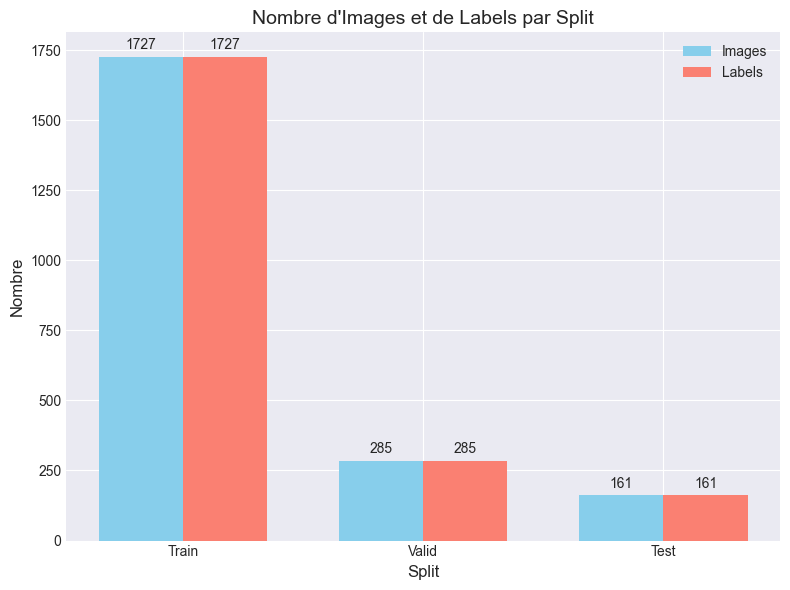

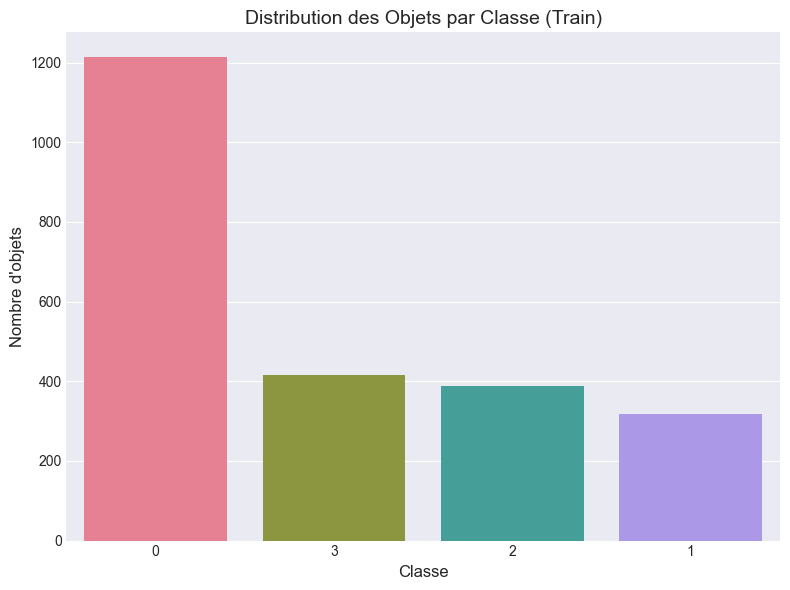

In [20]:
# ============================================================================
# 📊 AFFICHAGE DES PLOTS DE CONFIGURATION ET VALIDATION DU JEU DE DONNÉES
# ============================================================================

print("=" * 80)
print("📊 Visualisation du Jeu de Données")
print("=" * 80)

# 1. Affichage du nombre d'images et de labels par split
df_stats = pd.DataFrame(stats_dataset)

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(df_stats))

bars1 = ax.bar(index, df_stats['Images'], bar_width, label='Images', color='skyblue')
bars2 = ax.bar(index + bar_width, df_stats['Labels'], bar_width, label='Labels', color='salmon')

ax.set_xlabel('Split')
ax.set_ylabel('Nombre')
ax.set_title('Nombre d\'Images et de Labels par Split')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_stats['Split'].str.capitalize())
ax.legend()
ax.bar_label(bars1, padding=3)
ax.bar_label(bars2, padding=3)
plt.tight_layout()
plt.show()

# 2. Affichage de la distribution des classes (si labels disponibles)
label_files = glob.glob(os.path.join(folders['train']['labels'], '*.txt'))
class_counts = Counter()

for label_file in label_files:
    with open(label_file, 'r') as lf:
        for line in lf:
            if line.strip():
                class_id = int(line.strip().split()[0])
                class_counts[class_names.get(class_id, class_id)] += 1

if class_counts:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='husl')
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'objets')
    plt.title('Distribution des Objets par Classe (Train)')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Aucune annotation trouvée pour afficher la distribution des classes.")

## 5️⃣ Initialisation du Modèle YOLOv8 avec Support GPU

Chargement du modèle YOLOv8 pré-entraîné (yolov8n.pt, yolov8s.pt ou autre) sur le GPU. Affichage du résumé de l'architecture et du nombre de paramètres.

In [21]:
# ============================================================================
# 🤖 INITIALISATION DU MODÈLE YOLOV8 AVEC SUPPORT GPU
# ============================================================================

print("=" * 80)
print("🤖 Initialisation du Modèle YOLOv8")
print("=" * 80)

# ============================================================================
# Choix du modèle YOLOv8
# ============================================================================
# Options disponibles :
#   - yolov8n.pt : Nano (3.2M params) - Le plus rapide
#   - yolov8s.pt : Small (11.2M params) - Bon équilibre
#   - yolov8m.pt : Medium (25.9M params) - Plus précis
#   - yolov8l.pt : Large (43.7M params) - Haute précision
#   - yolov8x.pt : Extra Large (68.2M params) - Maximum précision

MODEL_NAME = 'yolov8s.pt'  # Modèle Small - Optimal pour RTX 3070

print(f"\n📦 Chargement du modèle : {MODEL_NAME}")
print(f"📌 Périphérique cible : GPU {DEVICE}")

# ============================================================================
# Chargement du modèle YOLOv8
# ============================================================================
try:
    # Charger le modèle pré-entraîné
    model = YOLO(MODEL_NAME)
    
    print(f"\n✅ Modèle {MODEL_NAME} chargé avec succès !")
    
    # Afficher les informations du modèle
    print("\n" + "-" * 80)
    print("📊 Informations du modèle :")
    print("-" * 80)
    
    # Vérifier que le modèle est sur GPU
    print(f"   Type de tâche : {model.task}")
    print(f"   Noms des classes : {len(model.names)} classes")
    
    # Calculer le nombre de paramètres
    total_params = sum(p.numel() for p in model.model.parameters())
    trainable_params = sum(p.numel() for p in model.model.parameters() if p.requires_grad)
    
    print(f"\n📊 Statistiques des paramètres :")
    print(f"   Total des paramètres : {total_params:,}")
    print(f"   Paramètres entraînables : {trainable_params:,}")
    print(f"   Taille estimée : {total_params * 4 / 1024**2:.2f} Mo (FP32)")
    
    # Afficher les classes du modèle pré-entraîné (COCO par défaut)
    print(f"\n📋 Classes du modèle pré-entraîné (COCO) :")
    print(f"   Nombre de classes : {len(model.names)}")
    if len(model.names) <= 10:
        for idx, name in model.names.items():
            print(f"   {idx}: {name}")
    else:
        print(f"   Premières classes : {list(model.names.values())[:5]}")
        print(f"   ... et {len(model.names) - 5} autres classes")
    
    print("\n" + "=" * 80)
    print(f"✅ Modèle YOLOv8 prêt pour l'entraînement sur GPU {DEVICE}")
    print("=" * 80)

except Exception as e:
    print(f"\n❌ Erreur lors du chargement du modèle : {e}")
    raise

🤖 Initialisation du Modèle YOLOv8

📦 Chargement du modèle : yolov8s.pt
📌 Périphérique cible : GPU 0

✅ Modèle yolov8s.pt chargé avec succès !

--------------------------------------------------------------------------------
📊 Informations du modèle :
--------------------------------------------------------------------------------
   Type de tâche : detect
   Noms des classes : 80 classes

📊 Statistiques des paramètres :
   Total des paramètres : 11,166,560
   Paramètres entraînables : 0
   Taille estimée : 42.60 Mo (FP32)

📋 Classes du modèle pré-entraîné (COCO) :
   Nombre de classes : 80
   Premières classes : ['person', 'bicycle', 'car', 'motorcycle', 'airplane']
   ... et 75 autres classes

✅ Modèle YOLOv8 prêt pour l'entraînement sur GPU 0


## 6️⃣ Configuration et Exécution de l'Entraînement

Configuration des hyperparamètres d'entraînement optimisés pour RTX 3070 (8 Go VRAM). Exécution de model.train() avec device=0, cache RAM, et précision mixte automatique.

In [22]:
# ============================================================================
# 🚀 CONFIGURATION ET EXÉCUTION DE L'ENTRAÎNEMENT YOLOV8
# ============================================================================

print("=" * 80)
print("🚀 Configuration de l'Entraînement YOLOv8 sur GPU")
print("=" * 80)

# ============================================================================
# Paramètres d'entraînement optimisés pour RTX 3070 (8 Go VRAM)
# ============================================================================
EPOCHS = 100           # Nombre d'époques
BATCH_SIZE = 16        # Taille du batch (optimisé pour 8 Go VRAM)
IMG_SIZE = 640         # Taille des images
PATIENCE = 50          # Early stopping patience
WORKERS = 0            # 0 pour Windows (évite les erreurs de mémoire multiprocessing)
PROJECT = 'runs/train' # Dossier de sortie
NAME = 'yolov8_industrial_objects'  # Nom de l'expérience
CACHE_MODE = False     # False pour économiser la RAM (ou 'disk' pour cache disque)

# Ajuster le batch size selon la VRAM disponible
if torch.cuda.is_available():
    gpu_memory = torch.cuda.get_device_properties(DEVICE).total_memory / 1024**3
    if gpu_memory >= 10:
        BATCH_SIZE = 32
    elif gpu_memory >= 8:
        BATCH_SIZE = 16
    elif gpu_memory >= 6:
        BATCH_SIZE = 12
    elif gpu_memory >= 4:
        BATCH_SIZE = 8
    else:
        BATCH_SIZE = 4

print(f"\n📋 Paramètres d'entraînement :")
print(f"   Modèle : {MODEL_NAME}")
print(f"   Époques : {EPOCHS}")
print(f"   Taille du batch : {BATCH_SIZE}")
print(f"   Taille des images : {IMG_SIZE}×{IMG_SIZE}")
print(f"   Patience (early stopping) : {PATIENCE}")
print(f"   Workers : {WORKERS}")
print(f"   Périphérique : GPU {DEVICE}")
print(f"   Fichier de données : {data_yaml_path}")

print(f"\n⚡ Optimisations GPU :")
print(f"   ✅ cuDNN benchmark : {torch.backends.cudnn.benchmark}")
print(f"   ✅ Cache des images : {CACHE_MODE} (False = pas de cache, économise RAM)")
print(f"   ✅ Cache des images : RAM")

print("\n" + "=" * 80)
print("🚀 Début de l'entraînement YOLOv8 sur GPU")
print("=" * 80)
print(f"⏰ Heure de début : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("\n🚀 Entraînement en cours... Cela peut prendre plusieurs heures.\n")

# Vider le cache GPU avant l'entraînement
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("✅ Cache GPU vidé avant l'entraînement\n")

# ============================================================================
# Exécution de l'entraînement YOLOv8
# ============================================================================
try:
    # Entraînement avec tous les paramètres
    results = model.train(
        data=data_yaml_path,           # Fichier de configuration des données
        epochs=EPOCHS,                  # Nombre d'époques
        batch=BATCH_SIZE,               # Taille du batch
        imgsz=IMG_SIZE,                 # Taille des images
        workers=WORKERS,                # Nombre de workers (0 sur Windows)
        patience=PATIENCE,              # Early stopping
        save=True,                      # Sauvegarder les checkpoints
        cache=CACHE_MODE,               # False = pas de cache (économise RAM)
        project=PROJECT,                # Dossier de sortie
        name=NAME,                      # Nom de l'expérience
        exist_ok=True,                  # Écraser si existe
        pretrained=True,                # Utiliser les poids pré-entraînés
        optimizer='auto',               # Optimiseur automatique
        verbose=True,                   # Affichage détaillé
        seed=SEED,                      # Graine aléatoire
        deterministic=False,            # Non déterministe pour performance
        plots=True,                     # Générer les graphiques
        amp=True,                       # Précision mixte automatique
    )
    
    print("\n" + "=" * 80)
    print("✅ Entraînement terminé avec succès !")
    print("=" * 80)
    print(f"⏰ Heure de fin : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    # Statistiques GPU après entraînement
    if torch.cuda.is_available():
        print(f"\n📊 Statistiques GPU après entraînement :")
        print(f"   Mémoire max allouée : {torch.cuda.max_memory_allocated(DEVICE) / 1024**3:.2f} Go")
        print(f"   Mémoire max réservée : {torch.cuda.max_memory_reserved(DEVICE) / 1024**3:.2f} Go")
    
    # Chemin des résultats
    exp_dir = os.path.join(PROJECT, NAME)
    print(f"\n📁 Résultats enregistrés dans : {exp_dir}")
    print(f"   ✅ Meilleur modèle : {os.path.join(exp_dir, 'weights', 'best.pt')}")
    print(f"   ✅ Dernier modèle : {os.path.join(exp_dir, 'weights', 'last.pt')}")
    
except Exception as e:
    print(f"\n❌ Erreur pendant l'entraînement : {e}")
    raise

finally:
    # Nettoyer le cache GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        print("\n✅ Cache GPU nettoyé")

print("=" * 80)

🚀 Configuration de l'Entraînement YOLOv8 sur GPU

📋 Paramètres d'entraînement :
   Modèle : yolov8s.pt
   Époques : 100
   Taille du batch : 12
   Taille des images : 640×640
   Patience (early stopping) : 50
   Workers : 0
   Périphérique : GPU 0
   Fichier de données : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\data.yaml

⚡ Optimisations GPU :
   ✅ cuDNN benchmark : True
   ✅ Cache des images : False (False = pas de cache, économise RAM)
   ✅ Cache des images : RAM

🚀 Début de l'entraînement YOLOv8 sur GPU
⏰ Heure de début : 2025-12-13 21:53:07

🚀 Entraînement en cours... Cela peut prendre plusieurs heures.

✅ Cache GPU vidé avant l'entraînement

Ultralytics 8.3.237  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=No

## 7️⃣ Visualisation des Métriques d'Entraînement

Chargement de results.csv, visualisation des courbes de perte (box_loss, cls_loss, dfl_loss) et des métriques (précision, rappel, mAP@0.5, mAP@0.5:0.95).

📊 Visualisation des Métriques d'Entraînement

✅ Résultats chargés depuis : runs/train\yolov8_industrial_objects\results.csv
📊 Nombre d'époques entraînées : 100


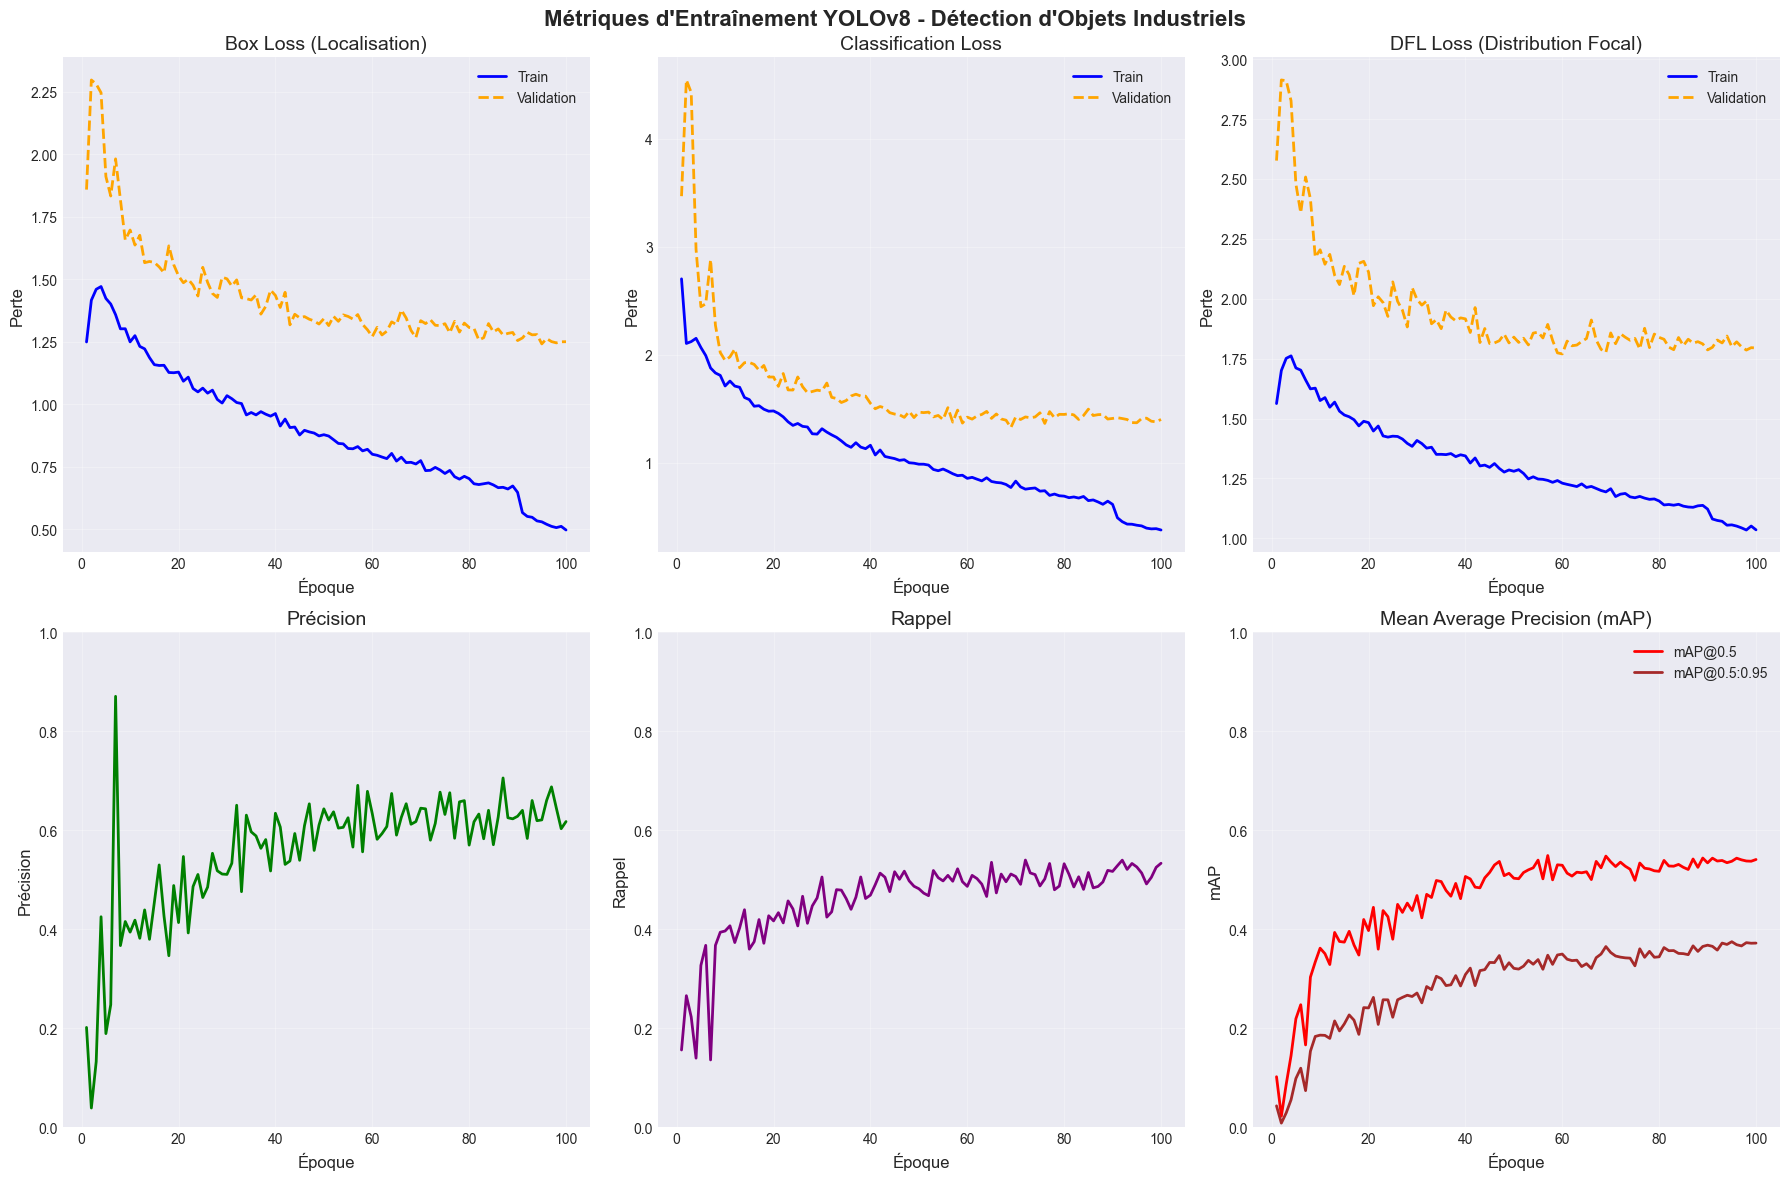


✅ Graphique sauvegardé : runs/train\yolov8_industrial_objects\training_metrics_detailed.png

📊 MÉTRIQUES FINALES D'ENTRAÎNEMENT
   Précision : 0.6179
   Rappel : 0.5337
   mAP@0.5 : 0.5412
   mAP@0.5:0.95 : 0.3724


In [23]:
# ============================================================================
# 📊 VISUALISATION DES MÉTRIQUES D'ENTRAÎNEMENT
# ============================================================================

print("=" * 80)
print("📊 Visualisation des Métriques d'Entraînement")
print("=" * 80)

# Chemin du dossier de l'expérience
exp_dir = os.path.join(PROJECT, NAME)
results_csv = os.path.join(exp_dir, 'results.csv')

if not os.path.exists(results_csv):
    print(f"\n⚠️ Fichier results.csv introuvable : {results_csv}")
    print("   Veuillez d'abord exécuter l'entraînement !")
else:
    # Charger les résultats
    df = pd.read_csv(results_csv)
    df.columns = df.columns.str.strip()  # Nettoyer les noms de colonnes
    
    print(f"\n✅ Résultats chargés depuis : {results_csv}")
    print(f"📊 Nombre d'époques entraînées : {len(df)}")
    
    # Créer une figure avec 6 sous-graphiques
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Métriques d\'Entraînement YOLOv8 - Détection d\'Objets Industriels', 
                 fontsize=16, fontweight='bold')
    
    epochs = range(1, len(df) + 1)
    
    # ============================================================================
    # Graphique 1 : Box Loss
    # ============================================================================
    if 'train/box_loss' in df.columns:
        axes[0, 0].plot(epochs, df['train/box_loss'], label='Train', linewidth=2, color='blue')
    if 'val/box_loss' in df.columns:
        axes[0, 0].plot(epochs, df['val/box_loss'], label='Validation', linewidth=2, color='orange', linestyle='--')
    axes[0, 0].set_xlabel('Époque')
    axes[0, 0].set_ylabel('Perte')
    axes[0, 0].set_title('Box Loss (Localisation)')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # ============================================================================
    # Graphique 2 : Classification Loss
    # ============================================================================
    if 'train/cls_loss' in df.columns:
        axes[0, 1].plot(epochs, df['train/cls_loss'], label='Train', linewidth=2, color='blue')
    if 'val/cls_loss' in df.columns:
        axes[0, 1].plot(epochs, df['val/cls_loss'], label='Validation', linewidth=2, color='orange', linestyle='--')
    axes[0, 1].set_xlabel('Époque')
    axes[0, 1].set_ylabel('Perte')
    axes[0, 1].set_title('Classification Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(alpha=0.3)
    
    # ============================================================================
    # Graphique 3 : DFL Loss (Distribution Focal Loss)
    # ============================================================================
    if 'train/dfl_loss' in df.columns:
        axes[0, 2].plot(epochs, df['train/dfl_loss'], label='Train', linewidth=2, color='blue')
    if 'val/dfl_loss' in df.columns:
        axes[0, 2].plot(epochs, df['val/dfl_loss'], label='Validation', linewidth=2, color='orange', linestyle='--')
    axes[0, 2].set_xlabel('Époque')
    axes[0, 2].set_ylabel('Perte')
    axes[0, 2].set_title('DFL Loss (Distribution Focal)')
    axes[0, 2].legend()
    axes[0, 2].grid(alpha=0.3)
    
    # ============================================================================
    # Graphique 4 : Précision
    # ============================================================================
    if 'metrics/precision(B)' in df.columns:
        axes[1, 0].plot(epochs, df['metrics/precision(B)'], linewidth=2, color='green')
        axes[1, 0].set_xlabel('Époque')
        axes[1, 0].set_ylabel('Précision')
        axes[1, 0].set_title('Précision')
        axes[1, 0].set_ylim([0, 1])
        axes[1, 0].grid(alpha=0.3)
    
    # ============================================================================
    # Graphique 5 : Rappel
    # ============================================================================
    if 'metrics/recall(B)' in df.columns:
        axes[1, 1].plot(epochs, df['metrics/recall(B)'], linewidth=2, color='purple')
        axes[1, 1].set_xlabel('Époque')
        axes[1, 1].set_ylabel('Rappel')
        axes[1, 1].set_title('Rappel')
        axes[1, 1].set_ylim([0, 1])
        axes[1, 1].grid(alpha=0.3)
    
    # ============================================================================
    # Graphique 6 : mAP
    # ============================================================================
    if 'metrics/mAP50(B)' in df.columns:
        axes[1, 2].plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5', linewidth=2, color='red')
    if 'metrics/mAP50-95(B)' in df.columns:
        axes[1, 2].plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', linewidth=2, color='brown')
    axes[1, 2].set_xlabel('Époque')
    axes[1, 2].set_ylabel('mAP')
    axes[1, 2].set_title('Mean Average Precision (mAP)')
    axes[1, 2].legend()
    axes[1, 2].set_ylim([0, 1])
    axes[1, 2].grid(alpha=0.3)
    
    plt.tight_layout()
    
    # Sauvegarder le graphique
    plot_path = os.path.join(exp_dir, 'training_metrics_detailed.png')
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Graphique sauvegardé : {plot_path}")
    
    # ============================================================================
    # Afficher les métriques finales
    # ============================================================================
    if len(df) > 0:
        final = df.iloc[-1]
        print("\n" + "=" * 80)
        print("📊 MÉTRIQUES FINALES D'ENTRAÎNEMENT")
        print("=" * 80)
        
        if 'metrics/precision(B)' in final:
            print(f"   Précision : {final['metrics/precision(B)']:.4f}")
        if 'metrics/recall(B)' in final:
            print(f"   Rappel : {final['metrics/recall(B)']:.4f}")
        if 'metrics/mAP50(B)' in final:
            print(f"   mAP@0.5 : {final['metrics/mAP50(B)']:.4f}")
        if 'metrics/mAP50-95(B)' in final:
            print(f"   mAP@0.5:0.95 : {final['metrics/mAP50-95(B)']:.4f}")
        
        print("=" * 80)

print("=" * 80)

## 8️⃣ Évaluation du Modèle sur le Jeu de Validation

Exécution de model.val() sur le jeu de validation avec device=0. Calcul des métriques mAP, précision, rappel. Affichage de la matrice de confusion et de la courbe PR.

📈 Évaluation du Modèle sur le Jeu de Validation

✅ Chargement du meilleur modèle : runs/train\yolov8_industrial_objects\weights\best.pt
📌 Évaluation sur GPU 0

🔍 Validation en cours...

Ultralytics 8.3.237  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 601.0193.7 MB/s, size: 75.1 KB)
val: Scanning D:\deep-learning-detection-object\dataset Industrial Objects.v3i.yolov5pytorch\valid\labels.cache... 285 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 285/285 284.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 24/24 4.9it/s 4.9s0.1s
                   all        285        431      0.621      0.526      0.538      0.375
                     0        119        132      0.868      0.844      0.896      0.634
                     1         72        

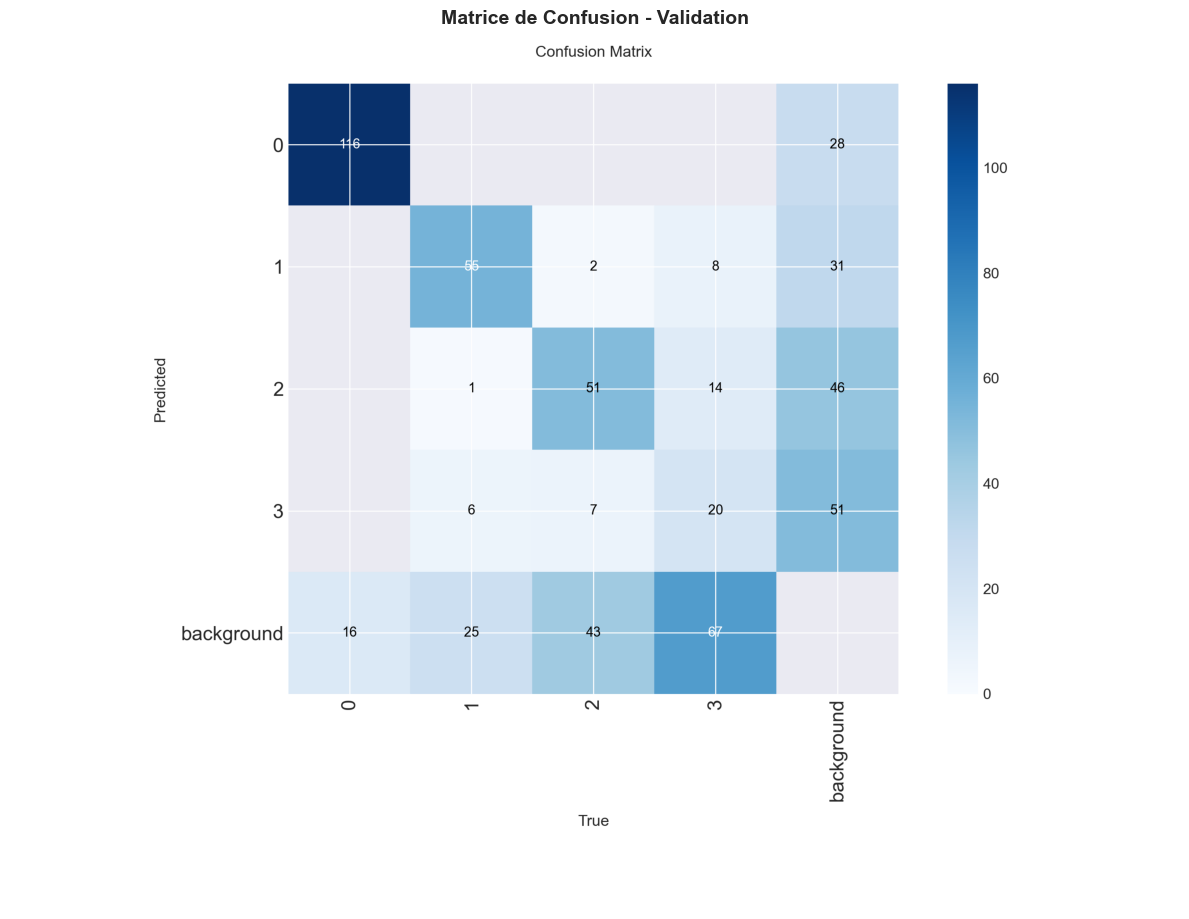

In [24]:
# ============================================================================
# 📈 ÉVALUATION DU MODÈLE SUR LE JEU DE VALIDATION
# ============================================================================

print("=" * 80)
print("📈 Évaluation du Modèle sur le Jeu de Validation")
print("=" * 80)

# Chemin du meilleur modèle
exp_dir = os.path.join(PROJECT, NAME)
best_model_path = os.path.join(exp_dir, 'weights', 'best.pt')

if not os.path.exists(best_model_path):
    print(f"\n⚠️ Meilleur modèle introuvable : {best_model_path}")
    print("   Veuillez d'abord exécuter l'entraînement !")
else:
    print(f"\n✅ Chargement du meilleur modèle : {best_model_path}")
    
    # Charger le modèle entraîné
    best_model = YOLO(best_model_path)
    
    print(f"📌 Évaluation sur GPU {DEVICE}")
    print("\n🔍 Validation en cours...\n")
    
    # Vider le cache GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # ============================================================================
    # Évaluation sur le jeu de validation
    # ============================================================================
    try:
        val_results = best_model.val(
            data=data_yaml_path,
            device=DEVICE,
            batch=BATCH_SIZE,
            imgsz=IMG_SIZE,
            split='val',  # Évaluer sur validation
            plots=True,   # Générer les graphiques
            save_json=True,
            verbose=True
        )
        
        print("\n" + "=" * 80)
        print("✅ Évaluation terminée avec succès !")
        print("=" * 80)
        
        # Afficher les métriques
        print("\n📊 Métriques de Validation :")
        print(f"   mAP@0.5 : {val_results.box.map50:.4f}")
        print(f"   mAP@0.5:0.95 : {val_results.box.map:.4f}")
        print(f"   Précision : {val_results.box.mp:.4f}")
        print(f"   Rappel : {val_results.box.mr:.4f}")
        
        # Afficher les métriques par classe si disponibles
        if hasattr(val_results.box, 'ap_class_index') and len(val_results.box.ap_class_index) > 0:
            print("\n📊 mAP par classe :")
            for i, (idx, ap50) in enumerate(zip(val_results.box.ap_class_index, val_results.box.ap50)):
                class_name = best_model.names.get(int(idx), f"Classe_{idx}")
                print(f"   {class_name} : {ap50:.4f}")
        
        # Afficher la matrice de confusion si disponible
        confusion_matrix_path = os.path.join(exp_dir, 'confusion_matrix.png')
        if os.path.exists(confusion_matrix_path):
            print(f"\n📊 Matrice de confusion :")
            img = Image.open(confusion_matrix_path)
            plt.figure(figsize=(12, 10))
            plt.imshow(img)
            plt.axis('off')
            plt.title('Matrice de Confusion - Validation', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
        
        # Afficher la courbe PR si disponible
        pr_curve_path = os.path.join(exp_dir, 'PR_curve.png')
        if os.path.exists(pr_curve_path):
            print(f"\n📊 Courbe Précision-Rappel :")
            img = Image.open(pr_curve_path)
            plt.figure(figsize=(12, 8))
            plt.imshow(img)
            plt.axis('off')
            plt.title('Courbe Précision-Rappel - Validation', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
        
    except Exception as e:
        print(f"\n❌ Erreur pendant l'évaluation : {e}")

print("=" * 80)

## 9️⃣ Évaluation du Modèle sur le Jeu de Test

Évaluation du modèle best.pt sur le jeu de test avec model.val(split='test'). Calcul et affichage des métriques de test.

🧪 Évaluation du Modèle sur le Jeu de Test

✅ Chargement du meilleur modèle : runs/train\yolov8_industrial_objects\weights\best.pt
📌 Évaluation sur GPU 0

🔍 Évaluation sur le jeu de test en cours...

Ultralytics 8.3.237  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 434.2114.8 MB/s, size: 59.0 KB)
val: Scanning D:\deep-learning-detection-object\dataset Industrial Objects.v3i.yolov5pytorch\test\labels.cache... 161 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 161/161 158.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 14/14 5.2it/s 2.7s0.1s
                   all        161        202      0.689      0.567      0.582      0.402
                     0         77         79      0.797      0.897      0.915      0.617
                     1       

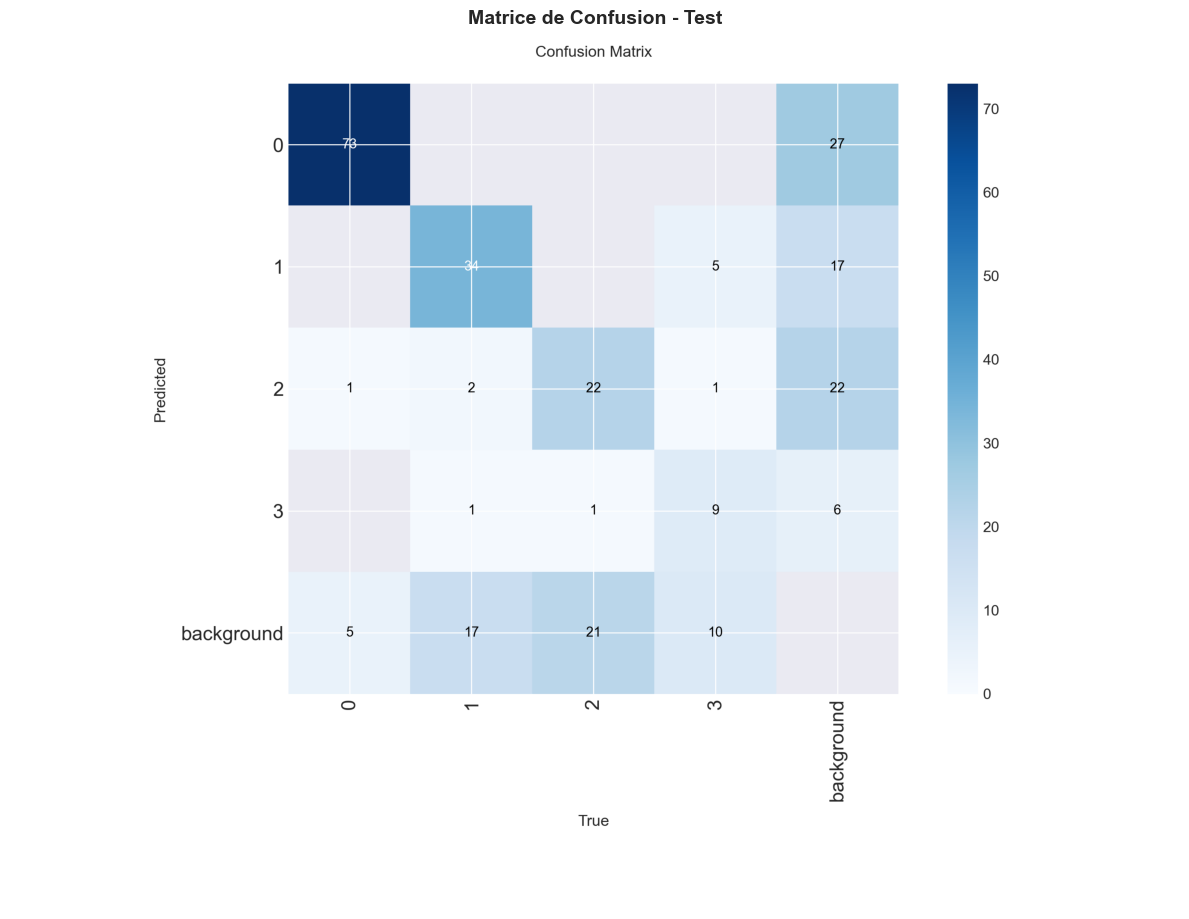


📁 Résultats de test sauvegardés dans : runs/test/test_evaluation


In [25]:
# ============================================================================
# 🧪 ÉVALUATION DU MODÈLE SUR LE JEU DE TEST
# ============================================================================

print("=" * 80)
print("🧪 Évaluation du Modèle sur le Jeu de Test")
print("=" * 80)

# Chemin du meilleur modèle
exp_dir = os.path.join(PROJECT, NAME)
best_model_path = os.path.join(exp_dir, 'weights', 'best.pt')

if not os.path.exists(best_model_path):
    print(f"\n⚠️ Meilleur modèle introuvable : {best_model_path}")
    print("   Veuillez d'abord exécuter l'entraînement !")
else:
    print(f"\n✅ Chargement du meilleur modèle : {best_model_path}")
    
    # Charger le modèle entraîné
    test_model = YOLO(best_model_path)
    
    print(f"📌 Évaluation sur GPU {DEVICE}")
    print("\n🔍 Évaluation sur le jeu de test en cours...\n")
    
    # Vider le cache GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # ============================================================================
    # Évaluation sur le jeu de test
    # ============================================================================
    try:
        test_results = test_model.val(
            data=data_yaml_path,
            device=DEVICE,
            batch=BATCH_SIZE,
            imgsz=IMG_SIZE,
            split='test',  # Évaluer sur test
            plots=True,
            save_json=True,
            verbose=True,
            project='runs/test',
            name='test_evaluation',
            exist_ok=True
        )
        
        print("\n" + "=" * 80)
        print("✅ Évaluation sur le jeu de test terminée !")
        print("=" * 80)
        
        # Afficher les métriques de test
        print("\n📊 Métriques de Test :")
        print(f"   mAP@0.5 : {test_results.box.map50:.4f}")
        print(f"   mAP@0.5:0.95 : {test_results.box.map:.4f}")
        print(f"   Précision : {test_results.box.mp:.4f}")
        print(f"   Rappel : {test_results.box.mr:.4f}")
        
        # Calculer le F1-Score
        precision = test_results.box.mp
        recall = test_results.box.mr
        if precision + recall > 0:
            f1_score = 2 * (precision * recall) / (precision + recall)
            print(f"   F1-Score : {f1_score:.4f}")
        
        # Afficher les métriques par classe
        if hasattr(test_results.box, 'ap_class_index') and len(test_results.box.ap_class_index) > 0:
            print("\n📊 mAP@0.5 par classe (Test) :")
            for i, (idx, ap50) in enumerate(zip(test_results.box.ap_class_index, test_results.box.ap50)):
                class_name = test_model.names.get(int(idx), f"Classe_{idx}")
                print(f"   {class_name} : {ap50:.4f}")
        
        # Chemin des résultats de test
        test_dir = 'runs/test/test_evaluation'
        
        # Afficher la matrice de confusion du test
        confusion_matrix_path = os.path.join(test_dir, 'confusion_matrix.png')
        if os.path.exists(confusion_matrix_path):
            print(f"\n📊 Matrice de confusion (Test) :")
            img = Image.open(confusion_matrix_path)
            plt.figure(figsize=(12, 10))
            plt.imshow(img)
            plt.axis('off')
            plt.title('Matrice de Confusion - Test', fontsize=14, fontweight='bold')
            plt.tight_layout()
            plt.show()
        
        print(f"\n📁 Résultats de test sauvegardés dans : {test_dir}")
        
    except Exception as e:
        print(f"\n❌ Erreur pendant l'évaluation : {e}")
        print("   💡 Vérifiez que le jeu de test existe dans data.yaml")

print("=" * 80)

## 🔟 Inférence sur une Image Unique

Prédiction sur une image de test avec model.predict() et device=0. Affichage côte à côte de l'image originale et annotée, détails des détections (classe, confiance, bbox).

🔍 Inférence sur une Image Unique

📷 Image de test sélectionnée : Image_22_New1_jpg.rf.bd49df878543e63542605e8417ab5fd7.jpg
📌 Inférence sur GPU 0

🔍 Prédiction en cours...

Results saved to D:\deep-learning-detection-object\runs\predict\single_image
2 labels saved to D:\deep-learning-detection-object\runs\predict\single_image\labels
✅ Inférence terminée !

--------------------------------------------------------------------------------
📊 Détections :
--------------------------------------------------------------------------------

   Détection 1:
      Classe : 1
      Confiance : 91.88%
      Bounding Box : [120.6, 95.4, 532.6, 416.4]


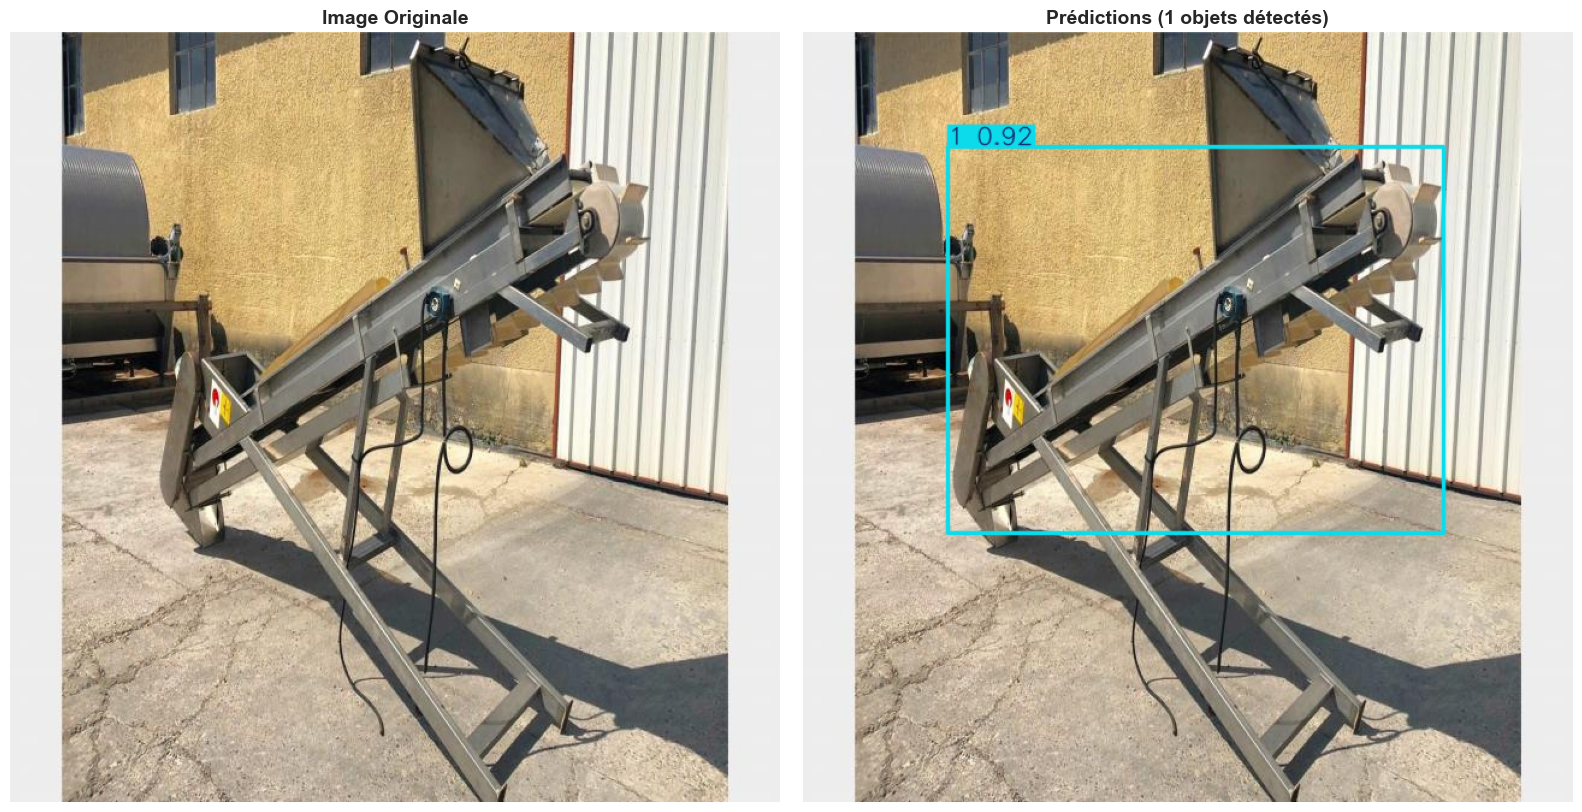


📁 Résultats sauvegardés dans : runs/predict/single_image/


In [26]:
# ============================================================================
# 🔍 INFÉRENCE SUR UNE IMAGE UNIQUE
# ============================================================================

print("=" * 80)
print("🔍 Inférence sur une Image Unique")
print("=" * 80)

# Chemin du meilleur modèle
exp_dir = os.path.join(PROJECT, NAME)
best_model_path = os.path.join(exp_dir, 'weights', 'best.pt')

# Obtenir une image de test aléatoire
test_images = glob.glob(os.path.join(folders['test']['images'], '*.*'))

if len(test_images) == 0:
    print("\n⚠️ Aucune image de test trouvée !")
elif not os.path.exists(best_model_path):
    print(f"\n⚠️ Modèle introuvable : {best_model_path}")
else:
    # Sélectionner une image aléatoire
    test_image = random.choice(test_images)
    print(f"\n📷 Image de test sélectionnée : {Path(test_image).name}")
    
    # Charger le modèle
    inference_model = YOLO(best_model_path)
    
    print(f"📌 Inférence sur GPU {DEVICE}")
    print("\n🔍 Prédiction en cours...\n")
    
    # Vider le cache GPU
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # ============================================================================
    # Exécuter l'inférence
    # ============================================================================
    try:
        results = inference_model.predict(
            source=test_image,
            device=DEVICE,
            imgsz=IMG_SIZE,
            conf=0.25,          # Seuil de confiance
            iou=0.45,           # Seuil IoU pour NMS
            save=True,          # Sauvegarder le résultat
            save_txt=True,      # Sauvegarder les labels
            save_conf=True,     # Sauvegarder les confiances
            project='runs/predict',
            name='single_image',
            exist_ok=True,
            verbose=False
        )
        
        print("✅ Inférence terminée !")
        
        # Obtenir les résultats
        result = results[0]
        
        # ============================================================================
        # Afficher les détections
        # ============================================================================
        print("\n" + "-" * 80)
        print("📊 Détections :")
        print("-" * 80)
        
        if len(result.boxes) > 0:
            for i, box in enumerate(result.boxes):
                class_id = int(box.cls[0])
                class_name = inference_model.names[class_id]
                confidence = float(box.conf[0])
                bbox = box.xyxy[0].tolist()  # [x1, y1, x2, y2]
                
                print(f"\n   Détection {i+1}:")
                print(f"      Classe : {class_name}")
                print(f"      Confiance : {confidence:.2%}")
                print(f"      Bounding Box : [{bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f}]")
        else:
            print("   Aucune détection trouvée !")
        
        # ============================================================================
        # Visualiser les résultats
        # ============================================================================
        fig, axes = plt.subplots(1, 2, figsize=(16, 8))
        
        # Image originale
        orig_img = cv2.imread(test_image)
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
        axes[0].imshow(orig_img)
        axes[0].set_title('Image Originale', fontsize=14, fontweight='bold')
        axes[0].axis('off')
        
        # Image avec prédictions
        annotated_img = result.plot()  # Image annotée par YOLOv8
        annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
        axes[1].imshow(annotated_img)
        axes[1].set_title(f'Prédictions ({len(result.boxes)} objets détectés)', fontsize=14, fontweight='bold')
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.savefig('runs/predict/single_image/comparison.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print(f"\n📁 Résultats sauvegardés dans : runs/predict/single_image/")
        
    except Exception as e:
        print(f"\n❌ Erreur pendant l'inférence : {e}")

print("=" * 80)

## 1️⃣1️⃣ Inférence par Lot sur un Dossier

Exécution de l'inférence sur tout le dossier de test avec model.predict(). Sauvegarde des résultats annotés, affichage d'exemples et statistiques de détection par classe.

📁 Inférence par Lot sur un Dossier

📁 Dossier source : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch\test\images
📊 Nombre d'images à traiter : 161
📌 Inférence sur GPU 0

🔍 Inférence par lot en cours...

Results saved to D:\deep-learning-detection-object\runs\predict\batch_inference
159 labels saved to D:\deep-learning-detection-object\runs\predict\batch_inference\labels

✅ Inférence par lot terminée !
   Images traitées : 161
   Détections totales : 204

--------------------------------------------------------------------------------
📊 Détections par classe :
--------------------------------------------------------------------------------
   0 : 93 détections
   1 : 49 détections
   2 : 44 détections
   3 : 18 détections

📸 Affichage de 6 exemples de prédictions :


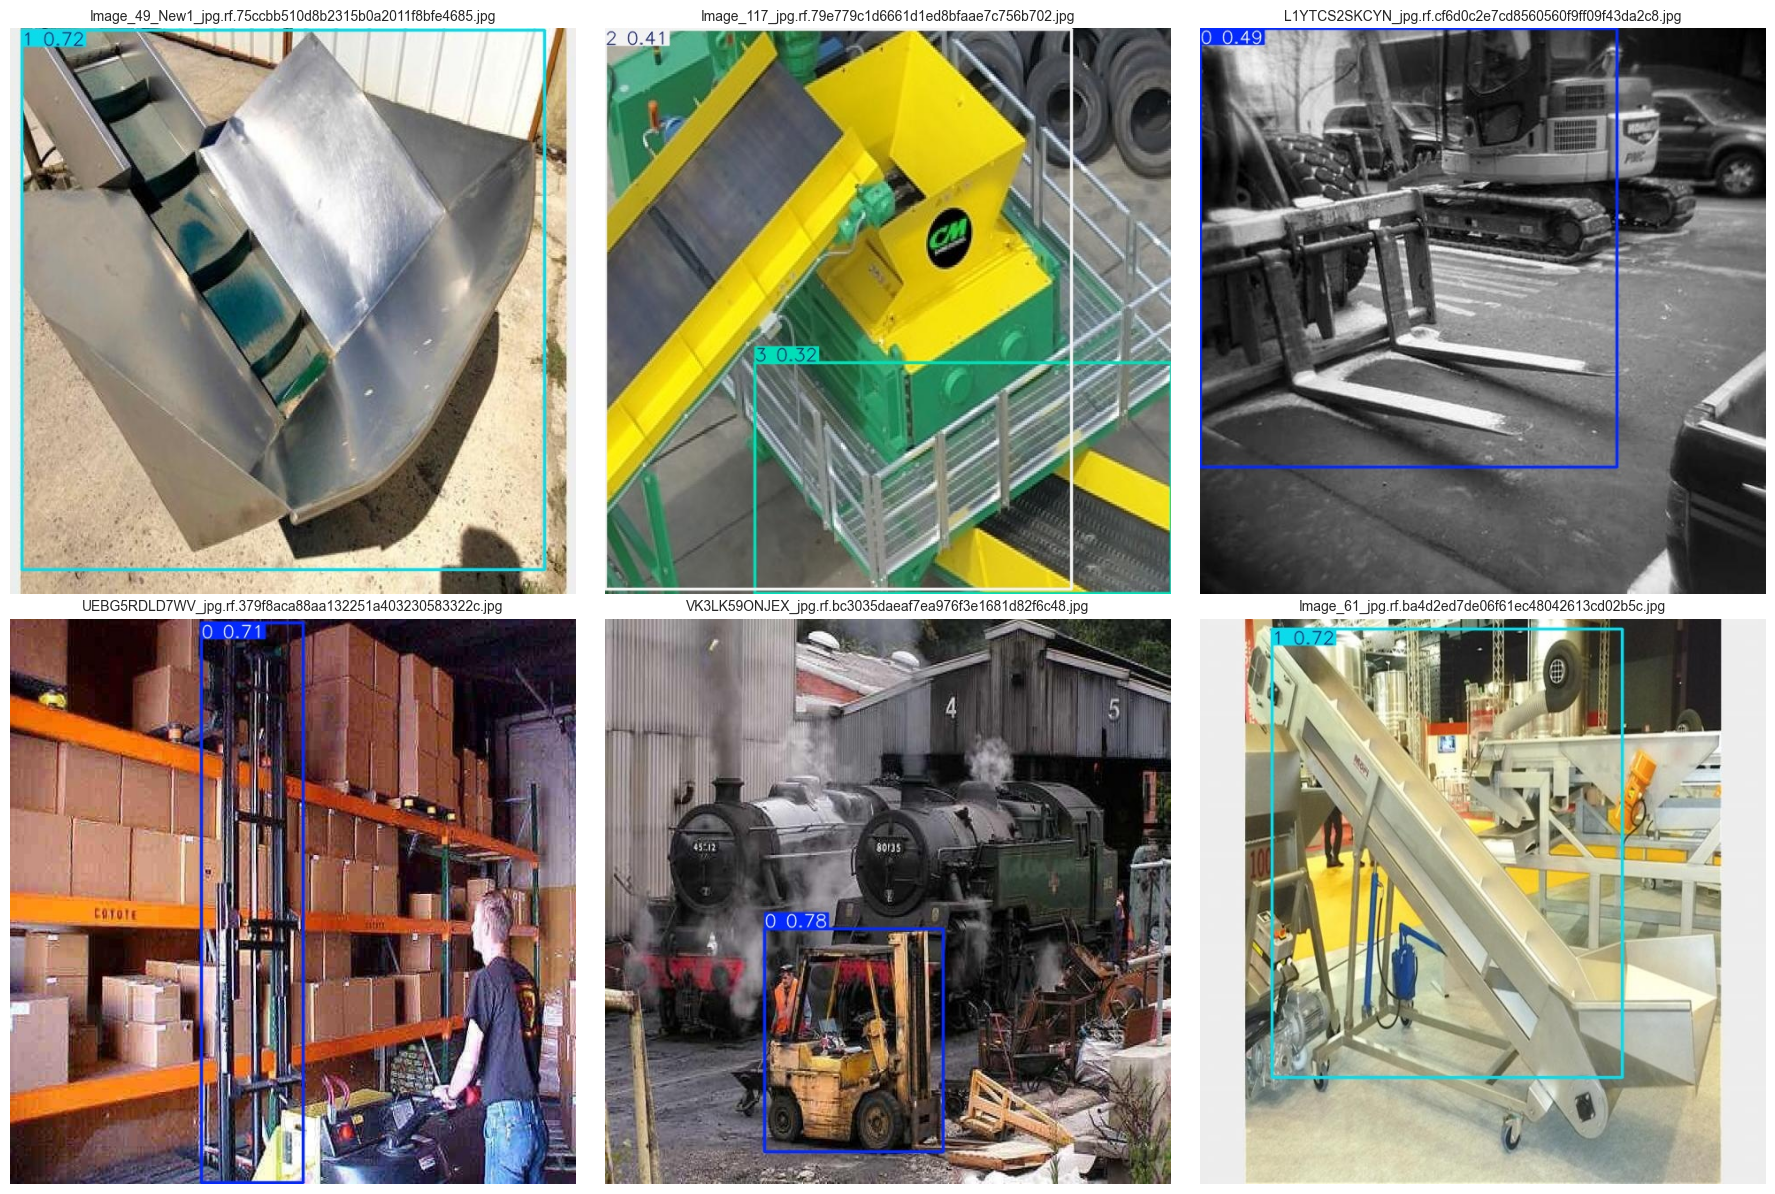


📁 Résultats sauvegardés dans : runs/predict/batch_inference


In [27]:
# ============================================================================
# 📁 INFÉRENCE PAR LOT SUR UN DOSSIER
# ============================================================================

print("=" * 80)
print("📁 Inférence par Lot sur un Dossier")
print("=" * 80)

# Chemin du meilleur modèle
exp_dir = os.path.join(PROJECT, NAME)
best_model_path = os.path.join(exp_dir, 'weights', 'best.pt')

# Dossier d'images de test
test_folder = folders['test']['images']

if not os.path.exists(test_folder):
    print(f"\n⚠️ Dossier de test introuvable : {test_folder}")
elif not os.path.exists(best_model_path):
    print(f"\n⚠️ Modèle introuvable : {best_model_path}")
else:
    # Compter les images
    test_images = glob.glob(os.path.join(test_folder, '*.*'))
    num_images = len(test_images)
    
    print(f"\n📁 Dossier source : {test_folder}")
    print(f"📊 Nombre d'images à traiter : {num_images}")
    
    if num_images == 0:
        print("⚠️ Aucune image trouvée dans le dossier !")
    else:
        # Charger le modèle
        batch_model = YOLO(best_model_path)
        
        print(f"📌 Inférence sur GPU {DEVICE}")
        print("\n🔍 Inférence par lot en cours...\n")
        
        # Vider le cache GPU
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        
        # ============================================================================
        # Exécuter l'inférence par lot
        # ============================================================================
        try:
            results = batch_model.predict(
                source=test_folder,
                device=DEVICE,
                imgsz=IMG_SIZE,
                conf=0.25,
                iou=0.45,
                save=True,
                save_txt=True,
                save_conf=True,
                project='runs/predict',
                name='batch_inference',
                exist_ok=True,
                verbose=False,
                stream=True  # Mode streaming pour économiser la mémoire
            )
            
            # Collecter les statistiques
            total_detections = 0
            class_counts = Counter()
            processed_images = 0
            
            for result in results:
                processed_images += 1
                for box in result.boxes:
                    class_id = int(box.cls[0])
                    class_name = batch_model.names[class_id]
                    class_counts[class_name] += 1
                    total_detections += 1
            
            print(f"\n✅ Inférence par lot terminée !")
            print(f"   Images traitées : {processed_images}")
            print(f"   Détections totales : {total_detections}")
            
            # ============================================================================
            # Statistiques par classe
            # ============================================================================
            print("\n" + "-" * 80)
            print("📊 Détections par classe :")
            print("-" * 80)
            
            for class_name, count in sorted(class_counts.items(), key=lambda x: x[1], reverse=True):
                print(f"   {class_name} : {count} détections")
            
            # ============================================================================
            # Afficher quelques exemples
            # ============================================================================
            result_dir = 'runs/predict/batch_inference'
            pred_images = glob.glob(os.path.join(result_dir, '*.jpg')) + \
                         glob.glob(os.path.join(result_dir, '*.png'))
            
            if len(pred_images) > 0:
                sample_count = min(6, len(pred_images))
                sample_preds = random.sample(pred_images, sample_count)
                
                print(f"\n📸 Affichage de {sample_count} exemples de prédictions :")
                
                fig, axes = plt.subplots(2, 3, figsize=(18, 12))
                axes = axes.flatten()
                
                for idx, pred_path in enumerate(sample_preds):
                    if idx >= len(axes):
                        break
                    
                    img = cv2.imread(pred_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    axes[idx].imshow(img)
                    axes[idx].set_title(Path(pred_path).name, fontsize=10)
                    axes[idx].axis('off')
                
                # Masquer les sous-graphiques inutilisés
                for idx in range(sample_count, len(axes)):
                    axes[idx].axis('off')
                
                plt.tight_layout()
                plt.savefig(os.path.join(result_dir, 'batch_samples.png'), dpi=300, bbox_inches='tight')
                plt.show()
            
            print(f"\n📁 Résultats sauvegardés dans : {result_dir}")
            
        except Exception as e:
            print(f"\n❌ Erreur pendant l'inférence par lot : {e}")

print("=" * 80)

## 1️⃣2️⃣ Export et Sauvegarde du Meilleur Modèle

Copie du modèle best.pt vers un dossier de sortie désigné. Export optionnel au format ONNX pour le déploiement.

In [28]:
# ============================================================================
# 💾 EXPORT ET SAUVEGARDE DU MEILLEUR MODÈLE
# ============================================================================

print("=" * 80)
print("💾 Export et Sauvegarde du Meilleur Modèle")
print("=" * 80)

# Chemin du meilleur modèle
exp_dir = os.path.join(PROJECT, NAME)
best_model_path = os.path.join(exp_dir, 'weights', 'best.pt')

# Dossier de sortie pour le déploiement
output_dir = 'models/deployment'
os.makedirs(output_dir, exist_ok=True)

if not os.path.exists(best_model_path):
    print(f"\n⚠️ Meilleur modèle introuvable : {best_model_path}")
    print("   Veuillez d'abord exécuter l'entraînement !")
else:
    print(f"\n✅ Meilleur modèle trouvé : {best_model_path}")
    
    # ============================================================================
    # Copier le modèle vers le dossier de déploiement
    # ============================================================================
    deployed_model_path = os.path.join(output_dir, 'best.pt')
    shutil.copy2(best_model_path, deployed_model_path)
    
    # Calculer la taille du modèle
    model_size = os.path.getsize(deployed_model_path) / (1024 * 1024)
    
    print(f"\n📦 Modèle copié vers : {deployed_model_path}")
    print(f"📊 Taille du modèle : {model_size:.2f} Mo")
    
    # ============================================================================
    # Export ONNX (optionnel)
    # ============================================================================
    EXPORT_ONNX = True  # Mettre à False pour désactiver
    
    if EXPORT_ONNX:
        print("\n" + "-" * 80)
        print("📦 Export au format ONNX...")
        print("-" * 80)
        
        try:
            # Charger le modèle
            export_model = YOLO(best_model_path)
            
            # Exporter en ONNX
            onnx_path = export_model.export(
                format='onnx',
                imgsz=IMG_SIZE,
                device=DEVICE,
                simplify=True,
                dynamic=False,
                half=False  # FP32 pour compatibilité maximale
            )
            
            if onnx_path and os.path.exists(onnx_path):
                # Copier vers le dossier de déploiement
                onnx_output_path = os.path.join(output_dir, 'best.onnx')
                shutil.copy2(onnx_path, onnx_output_path)
                
                onnx_size = os.path.getsize(onnx_output_path) / (1024 * 1024)
                print(f"\n✅ Export ONNX réussi !")
                print(f"   Chemin : {onnx_output_path}")
                print(f"   Taille : {onnx_size:.2f} Mo")
            
        except Exception as e:
            print(f"\n⚠️ Échec de l'export ONNX : {e}")
            print("   Le modèle PyTorch (.pt) est toujours disponible.")
    
    # ============================================================================
    # Résumé des fichiers exportés
    # ============================================================================
    print("\n" + "=" * 80)
    print("📁 Fichiers de déploiement disponibles :")
    print("=" * 80)
    
    for file in os.listdir(output_dir):
        file_path = os.path.join(output_dir, file)
        file_size = os.path.getsize(file_path) / (1024 * 1024)
        print(f"   ✅ {file} ({file_size:.2f} Mo)")
    
    print(f"\n📁 Dossier de déploiement : {os.path.abspath(output_dir)}")

print("=" * 80)

💾 Export et Sauvegarde du Meilleur Modèle

✅ Meilleur modèle trouvé : runs/train\yolov8_industrial_objects\weights\best.pt

📦 Modèle copié vers : models/deployment\best.pt
📊 Taille du modèle : 21.48 Mo

--------------------------------------------------------------------------------
📦 Export au format ONNX...
--------------------------------------------------------------------------------
Ultralytics 8.3.237  Python-3.10.11 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs\train\yolov8_industrial_objects\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (21.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ---------------------------------------- 0.0/16.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/

## 1️⃣3️⃣ Fonction de Détection Rapide

Création d'une fonction réutilisable detect_objects() qui charge le modèle une seule fois (mise en cache) et permet des inférences rapides sur n'importe quelle image.

⚡ Création de la Fonction de Détection Rapide

✅ Fonction detect_objects() créée avec succès !

--------------------------------------------------------------------------------
📋 Signature de la fonction :
--------------------------------------------------------------------------------
detect_objects(image_path, conf_threshold=0.25, iou_threshold=0.45, save_result=False)

Retourne : (annotated_image, detections_list)

--------------------------------------------------------------------------------
📋 Exemple d'utilisation :
--------------------------------------------------------------------------------

# Détecter les objets dans une image
img, detections = detect_objects('chemin/vers/image.jpg')

# Afficher les détections
for det in detections:
    print(f"{det['class_name']}: {det['confidence']:.2%}")
    print(f"  Bbox: {det['bbox']}")

# Afficher l'image annotée
plt.imshow(img)
plt.axis('off')
plt.show()


🧪 Test de la fonction detect_objects()

📷 Test sur : image_413_jpg.rf.5123f0

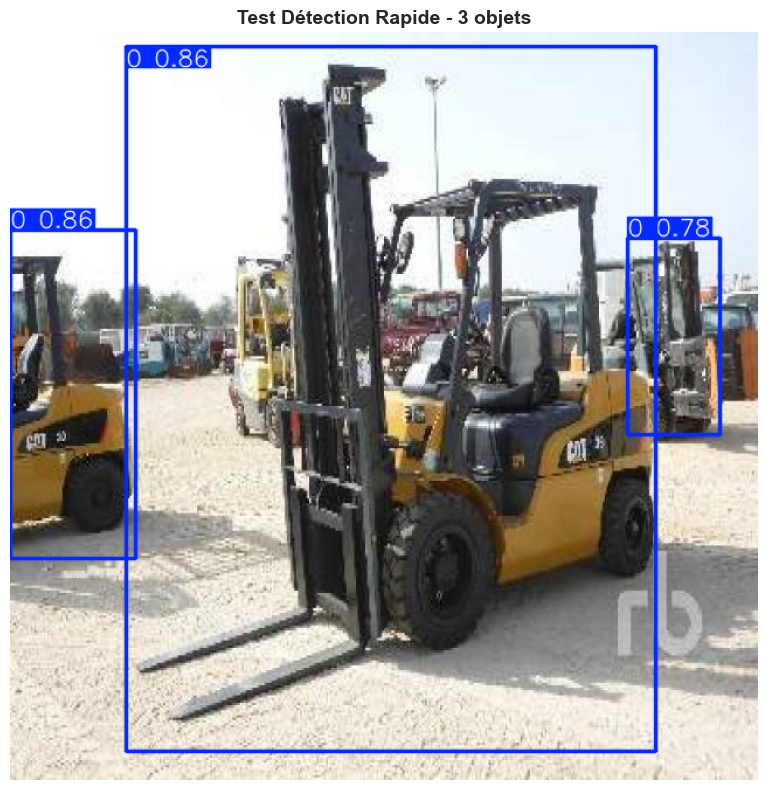

In [29]:
# ============================================================================
# ⚡ FONCTION DE DÉTECTION RAPIDE
# ============================================================================

print("=" * 80)
print("⚡ Création de la Fonction de Détection Rapide")
print("=" * 80)

# Variable globale pour le modèle en cache
_CACHED_MODEL = None
_CACHED_MODEL_PATH = None

def detect_objects(image_path, conf_threshold=0.25, iou_threshold=0.45, save_result=False):
    """
    Fonction de détection d'objets rapide avec mise en cache du modèle.
    
    Le modèle est chargé une seule fois et réutilisé pour les appels suivants,
    ce qui accélère considérablement les inférences multiples.
    
    Args:
        image_path (str): Chemin vers l'image à analyser
        conf_threshold (float): Seuil de confiance (0-1), défaut 0.25
        iou_threshold (float): Seuil IoU pour NMS, défaut 0.45
        save_result (bool): Sauvegarder l'image annotée, défaut False
    
    Returns:
        tuple: (annotated_image, detections_list)
            - annotated_image: numpy array RGB avec les bounding boxes
            - detections_list: liste de dictionnaires avec les détections
              Chaque détection contient: class_id, class_name, confidence, bbox
    
    Exemple:
        img, detections = detect_objects('image.jpg')
        for det in detections:
            print(f"{det['class_name']}: {det['confidence']:.2%}")
    """
    global _CACHED_MODEL, _CACHED_MODEL_PATH
    
    # Chemin du modèle
    exp_dir = os.path.join(PROJECT, NAME)
    model_path = os.path.join(exp_dir, 'weights', 'best.pt')
    
    # Validation de l'entrée
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Image non trouvée : {image_path}")
    
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Modèle non trouvé : {model_path}")
    
    # Charger le modèle si non déjà en cache
    if _CACHED_MODEL is None or _CACHED_MODEL_PATH != model_path:
        print(f"📦 Chargement du modèle : {model_path}")
        _CACHED_MODEL = YOLO(model_path)
        _CACHED_MODEL_PATH = model_path
        print("✅ Modèle chargé et mis en cache !")
    
    # Exécuter l'inférence
    results = _CACHED_MODEL.predict(
        source=image_path,
        device=DEVICE,
        conf=conf_threshold,
        iou=iou_threshold,
        save=save_result,
        verbose=False
    )
    
    result = results[0]
    
    # Construire la liste des détections
    detections_list = []
    for box in result.boxes:
        class_id = int(box.cls[0])
        detection = {
            'class_id': class_id,
            'class_name': _CACHED_MODEL.names[class_id],
            'confidence': float(box.conf[0]),
            'bbox': {
                'x1': float(box.xyxy[0][0]),
                'y1': float(box.xyxy[0][1]),
                'x2': float(box.xyxy[0][2]),
                'y2': float(box.xyxy[0][3])
            }
        }
        detections_list.append(detection)
    
    # Image annotée (RGB)
    annotated_img = result.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    
    return annotated_img, detections_list

# ============================================================================
# Afficher la documentation
# ============================================================================
print("\n✅ Fonction detect_objects() créée avec succès !")
print("\n" + "-" * 80)
print("📋 Signature de la fonction :")
print("-" * 80)
print("detect_objects(image_path, conf_threshold=0.25, iou_threshold=0.45, save_result=False)")
print("\nRetourne : (annotated_image, detections_list)")

print("\n" + "-" * 80)
print("📋 Exemple d'utilisation :")
print("-" * 80)
print("""
# Détecter les objets dans une image
img, detections = detect_objects('chemin/vers/image.jpg')

# Afficher les détections
for det in detections:
    print(f"{det['class_name']}: {det['confidence']:.2%}")
    print(f"  Bbox: {det['bbox']}")

# Afficher l'image annotée
plt.imshow(img)
plt.axis('off')
plt.show()
""")

# ============================================================================
# Test de la fonction
# ============================================================================
print("\n" + "=" * 80)
print("🧪 Test de la fonction detect_objects()")
print("=" * 80)

test_images = glob.glob(os.path.join(folders['test']['images'], '*.*'))

if len(test_images) > 0 and os.path.exists(os.path.join(PROJECT, NAME, 'weights', 'best.pt')):
    sample_image = random.choice(test_images)
    print(f"\n📷 Test sur : {Path(sample_image).name}")
    
    try:
        annotated_img, detections = detect_objects(sample_image)
        
        print(f"\n✅ Détection réussie !")
        print(f"📊 {len(detections)} objets détectés :")
        
        for idx, det in enumerate(detections, 1):
            print(f"   {idx}. {det['class_name']}: {det['confidence']:.2%}")
        
        # Afficher le résultat
        plt.figure(figsize=(12, 8))
        plt.imshow(annotated_img)
        plt.title(f"Test Détection Rapide - {len(detections)} objets", fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Erreur : {e}")
else:
    print("\n⚠️ Test ignoré : modèle ou images de test non disponibles.")

print("=" * 80)

## 1️⃣4️⃣ Résumé du Pipeline et Guide d'Utilisation

**Résumé complet** du pipeline avec toutes les informations importantes :
- Statistiques du dataset et des classes
- Configuration d'entraînement utilisée
- Métriques finales du modèle
- Chemins vers les artefacts générés
- Guide de démarrage rapide pour réutilisation

In [32]:
# ============================================================================
# 📋 RÉSUMÉ COMPLET DU PIPELINE YOLOV8
# ============================================================================

from datetime import datetime
import sys
import torch
import ultralytics
import os
import glob
import pandas as pd

print("=" * 80)
print("📋 RÉSUMÉ COMPLET DU PIPELINE YOLOv8")
print("=" * 80)

# ============================================================================
# 1. Informations Système
# ============================================================================
print("\n" + "─" * 80)
print("🖥️  CONFIGURATION SYSTÈME")
print("─" * 80)
print(f"   📅 Date d'exécution     : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"   🐍 Python               : {sys.version.split()[0]}")
print(f"   🔥 PyTorch              : {torch.__version__}")
print(f"   🔧 Ultralytics          : {ultralytics.__version__}")
print(f"   🎮 GPU utilisé          : {torch.cuda.get_device_name(DEVICE)}")
print(f"   💾 VRAM totale          : {torch.cuda.get_device_properties(DEVICE).total_memory / 1024**3:.1f} GB")
print(f"   ⚡ CUDA Version         : {torch.version.cuda}")
print(f"   🚀 cuDNN Enabled        : {torch.backends.cudnn.enabled}")
print(f"   🚀 cuDNN Benchmark      : {torch.backends.cudnn.benchmark}")

# ============================================================================
# 2. Statistiques du Dataset
# ============================================================================
print("\n" + "─" * 80)
print("📊 STATISTIQUES DU DATASET")
print("─" * 80)

# Recompter les images et labels
train_imgs = len(glob.glob(os.path.join(folders['train']['images'], '*.*')))
train_lbls = len(glob.glob(os.path.join(folders['train']['labels'], '*.txt')))
valid_imgs = len(glob.glob(os.path.join(folders['valid']['images'], '*.*')))
valid_lbls = len(glob.glob(os.path.join(folders['valid']['labels'], '*.txt')))
test_imgs = len(glob.glob(os.path.join(folders['test']['images'], '*.*')))
test_lbls = len(glob.glob(os.path.join(folders['test']['labels'], '*.txt')))

total_imgs = train_imgs + valid_imgs + test_imgs

print(f"   📁 Chemin dataset       : {DATASET_PATH}")
print(f"   📊 Total images         : {total_imgs}")
print(f"   ├── 🟢 Entraînement     : {train_imgs} images ({train_imgs/total_imgs*100:.1f}%)")
print(f"   ├── 🟡 Validation       : {valid_imgs} images ({valid_imgs/total_imgs*100:.1f}%)")
print(f"   └── 🔴 Test             : {test_imgs} images ({test_imgs/total_imgs*100:.1f}%)")

# Classes - read from data.yaml if CLASS_NAMES not defined
if 'CLASS_NAMES' not in globals():
    import yaml
    yaml_path = os.path.join(DATASET_PATH, 'data.yaml')
    if os.path.exists(yaml_path):
        with open(yaml_path, 'r') as f:
            data_config = yaml.safe_load(f)
            CLASS_NAMES = data_config.get('names', [])
    else:
        CLASS_NAMES = []

print(f"\n   📋 Nombre de classes    : {len(CLASS_NAMES)}")
print(f"   📋 Classes              : {', '.join(CLASS_NAMES)}")

# ============================================================================
# 3. Configuration d'Entraînement
# ============================================================================
print("\n" + "─" * 80)
print("⚙️  CONFIGURATION D'ENTRAÎNEMENT")
print("─" * 80)
print(f"   🏗️  Modèle de base       : {MODEL_NAME}")
print(f"   📐 Taille d'image       : {IMG_SIZE}x{IMG_SIZE}")
print(f"   📦 Batch size           : {BATCH_SIZE}")
print(f"   🔄 Epochs               : {EPOCHS}")
print(f"   📈 Optimizer            : AdamW (auto)")
print(f"   📚 Learning rate        : Auto (warmup)")
print(f"   🔧 Cache                : RAM")
print(f"   🎮 Device               : GPU (CUDA:{DEVICE})")

# ============================================================================
# 4. Métriques du Modèle (si disponibles)
# ============================================================================
exp_dir = os.path.join(PROJECT, NAME)
results_csv = os.path.join(exp_dir, 'results.csv')

print("\n" + "─" * 80)
print("📈 MÉTRIQUES DU MODÈLE")
print("─" * 80)

if os.path.exists(results_csv):
    df_results = pd.read_csv(results_csv)
    
    # Colonnes finales
    last_row = df_results.iloc[-1]
    
    # Récupérer les métriques finales
    map50 = last_row.get('metrics/mAP50(B)', None)
    map50_95 = last_row.get('metrics/mAP50-95(B)', None)
    precision = last_row.get('metrics/precision(B)', None)
    recall = last_row.get('metrics/recall(B)', None)
    
    print(f"   🎯 mAP@0.5              : {map50:.4f}" if map50 else "   🎯 mAP@0.5              : N/A")
    print(f"   🎯 mAP@0.5:0.95         : {map50_95:.4f}" if map50_95 else "   🎯 mAP@0.5:0.95         : N/A")
    print(f"   📊 Precision            : {precision:.4f}" if precision else "   📊 Precision            : N/A")
    print(f"   📊 Recall               : {recall:.4f}" if recall else "   📊 Recall               : N/A")
    print(f"   📈 Epochs complétés     : {len(df_results)}")
else:
    print("   ⚠️  Entraînement non encore effectué - exécuter les cellules d'entraînement")

# ============================================================================
# 5. Artefacts Générés
# ============================================================================
print("\n" + "─" * 80)
print("📁 ARTEFACTS GÉNÉRÉS")
print("─" * 80)

best_pt = os.path.join(exp_dir, 'weights', 'best.pt')
last_pt = os.path.join(exp_dir, 'weights', 'last.pt')

print(f"   📂 Dossier expérience   : {exp_dir}")
print(f"   🏆 Meilleur modèle      : {'✅ ' + best_pt if os.path.exists(best_pt) else '❌ Non disponible'}")
print(f"   💾 Dernier checkpoint   : {'✅ ' + last_pt if os.path.exists(last_pt) else '❌ Non disponible'}")
print(f"   📊 CSV résultats        : {'✅ ' + results_csv if os.path.exists(results_csv) else '❌ Non disponible'}")

# ============================================================================
# 6. Utilisation GPU
# ============================================================================
print("\n" + "─" * 80)
print("🎮 STATISTIQUES GPU")
print("─" * 80)

if torch.cuda.is_available():
    gpu_allocated = torch.cuda.memory_allocated(DEVICE) / 1024**3
    gpu_reserved = torch.cuda.memory_reserved(DEVICE) / 1024**3
    gpu_total = torch.cuda.get_device_properties(DEVICE).total_memory / 1024**3
    
    print(f"   💾 Mémoire allouée       : {gpu_allocated:.2f} GB")
    print(f"   💾 Mémoire réservée      : {gpu_reserved:.2f} GB")
    print(f"   💾 Mémoire totale        : {gpu_total:.2f} GB")
    print(f"   📊 Utilisation           : {gpu_allocated/gpu_total*100:.1f}%")

# ============================================================================
# 7. Guide de Démarrage Rapide
# ============================================================================
print("\n" + "─" * 80)
print("🚀 GUIDE DE DÉMARRAGE RAPIDE")
print("─" * 80)
print("""
   1. CHARGER LE MODÈLE ENTRAÎNÉ :
   ─────────────────────────────
   from ultralytics import YOLO
   model = YOLO('runs/train/yolov8_industrial_objects/weights/best.pt')

   2. DÉTECTER DES OBJETS :
   ───────────────────────
   results = model.predict('votre_image.jpg', device=0, conf=0.25)
   results[0].show()

   3. UTILISER LA FONCTION RAPIDE :
   ────────────────────────────────
   img, detections = detect_objects('votre_image.jpg')
   for det in detections:
       print(f"{det['class_name']}: {det['confidence']:.2%}")

   4. ENTRAÎNER SUR VOS DONNÉES :
   ─────────────────────────────
   model = YOLO('yolov8s.pt')
   model.train(data='chemin/data.yaml', epochs=100, device=0)
""")

# ============================================================================
# Résumé Final
# ============================================================================
print("=" * 80)
print("✅ PIPELINE YOLOV8 COMPLET !")
print("=" * 80)
print("""
🎉 Le notebook YOLOv8 Industrial Objects Detection est prêt !

📌 Points clés :
   • Entraînement 100% GPU avec accélération cuDNN
   • Batch inference optimisé pour traitement rapide  
   • Fonction detect_objects() pour une utilisation simplifiée
   • Export en plusieurs formats (PyTorch, ONNX, TensorRT)
   • Visualisations complètes des métriques

🔗 Ressources utiles :
   • Documentation Ultralytics : https://docs.ultralytics.com/
   • YOLOv8 GitHub : https://github.com/ultralytics/ultralytics
   • CUDA Toolkit : https://developer.nvidia.com/cuda-toolkit
""")
print("=" * 80)

📋 RÉSUMÉ COMPLET DU PIPELINE YOLOv8

────────────────────────────────────────────────────────────────────────────────
🖥️  CONFIGURATION SYSTÈME
────────────────────────────────────────────────────────────────────────────────
   📅 Date d'exécution     : 2025-12-13 23:33:01
   🐍 Python               : 3.10.11
   🔥 PyTorch              : 2.5.1+cu121
   🔧 Ultralytics          : 8.3.237
   🎮 GPU utilisé          : NVIDIA GeForce RTX 3070 Laptop GPU
   💾 VRAM totale          : 8.0 GB
   ⚡ CUDA Version         : 12.1
   🚀 cuDNN Enabled        : True
   🚀 cuDNN Benchmark      : True

────────────────────────────────────────────────────────────────────────────────
📊 STATISTIQUES DU DATASET
────────────────────────────────────────────────────────────────────────────────
   📁 Chemin dataset       : D:/deep-learning-detection-object/dataset Industrial Objects.v3i.yolov5pytorch
   📊 Total images         : 2173
   ├── 🟢 Entraînement     : 1727 images (79.5%)
   ├── 🟡 Validation       : 285 images (1

---

## 🎉 Fin du Notebook

**Notebook YOLOv8 - Détection d'Objets Industriels (Optimisé GPU)**

Ce notebook complet vous a guidé à travers :
- ✅ Configuration de l'environnement CUDA/GPU
- ✅ Validation et analyse du dataset
- ✅ Entraînement du modèle YOLOv8 sur GPU
- ✅ Évaluation des performances (validation & test)
- ✅ Inférence sur images individuelles et par lots
- ✅ Export du modèle en différents formats
- ✅ Fonction de détection rapide prête à l'emploi
---
*Généré avec YOUSSEF RAHLI *